# PROBLEM STATEMENT

The dataset "Sample_data" in which each row represents an independent experiment and each column represents one measurement (feature) of the experiment. The first column (ref_group) defines the experimental condition.
A subset of these experiments belongs to the so called reference groups which are apparent by the group column:

reference group A: group == group_A

reference group B: group == group_B

reference group C: group == group_C

reference group D: group == group_D

reference group E: group == group_E

As a DataScientist you are assigned with the task of clustering our experiments into distinct groups.

# IMPORTING LIBRARIES

In [178]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.cluster import KMeans
import sklearn.cluster
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.model_selection import cross_validate


# LOADING THE DATASET

In [179]:
df =pd.read_csv(r"C:\Users\Hp\Downloads\sample_data.csv")

In [180]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

The dataset contains 10443 rows and 1490 columns. Each row represents an unique expirement result, Our target is to 
assign the ref_group "unknown" into any of the existing cluster groups or else we can check for the scope of determining a 
new group.

In [181]:
df.shape

(10443, 1490)

In [182]:
df.dtypes

ref_group        object
feature_1        object
feature_2       float64
feature_3       float64
feature_4       float64
                 ...   
feature_1485    float64
feature_1486    float64
feature_1487    float64
feature_1488    float64
feature_1489    float64
Length: 1490, dtype: object

The dataset contains "float64" and "object" datatypes

In [183]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

In [184]:
df.dropna
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 10443


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10443 entries, 0 to 10442
Columns: 1490 entries, ref_group to feature_1489
dtypes: float64(1488), object(2)
memory usage: 118.7+ MB


The dataset contains 1488 numerical entries and 2 categorical columns.

<AxesSubplot:>

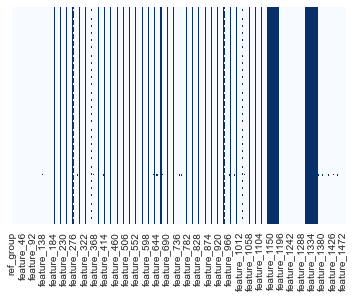

In [186]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')

# Plotting the "ref_grop" unique values

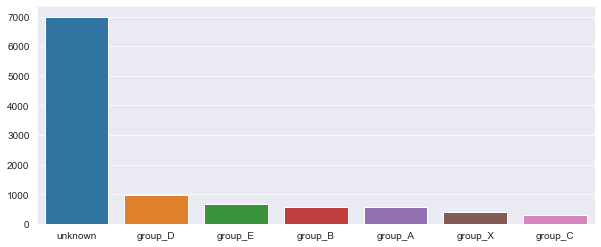

In [187]:
ref= df.ref_group.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize = (10,4))
sns.barplot(x = ref.index, y=ref.values)
plt.show()

From the above plot, 

unknow group contains 6994 values
group_D contains 959 values
group_E  contains 670 values
group_B contains 576 values
group_A contains 574 values
group_X contains 382 values
group_C contains 288 values

Our task is to identify the cluster for "unknown" category

In [188]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

In [189]:
print("Total categories in the feature ref_group:\n",df["ref_group"].value_counts(), "\n")
print("Total categories in the feature_1:\n", df["feature_1"].value_counts())

Total categories in the feature ref_group:
 unknown    6994
group_D     959
group_E     670
group_B     576
group_A     574
group_X     382
group_C     288
Name: ref_group, dtype: int64 

Total categories in the feature_1:
 z_score    10443
Name: feature_1, dtype: int64


In [190]:
df

ref_group feature_1  feature_2  feature_3  feature_4  feature_5  \
0       group_D   z_score  -0.855401   0.878908  -0.294277  -0.276856   
1       group_X   z_score  -0.514954  -0.102163   0.533037   0.518627   
2       unknown   z_score   0.659277   1.339006  -0.828283  -0.792608   
3       unknown   z_score  -0.451562   0.607107  -0.077825  -0.082196   
4       unknown   z_score  -0.180138   0.715372  -0.874969  -0.842122   
...         ...       ...        ...        ...        ...        ...   
10438   group_D   z_score   0.990676  -2.177556   0.996033   1.015562   
10439   group_D   z_score   0.217427  -1.293580  -0.189877  -0.059088   
10440   group_D   z_score   1.446129  -1.329197   0.223080   0.152475   
10441   group_D   z_score   1.177426  -1.571178   0.190298   0.261232   
10442   group_D   z_score   0.842133   0.779006   0.333823   0.351760   

       feature_6  feature_7  feature_8  feature_9  ...  feature_1480  \
0      -0.070858  -0.128097   0.002755   0.002755  ...     -0.045789   
1       0.130935   0.056910   0.705432   0.705432  ...     -0.022304   
2      -0.154456  -0.138686  -0.501680  -0.501680  ...     -0.053745   
3       0.046872   0.065412  -0.049056  -0.049056  ...     -0.034710   
4      -0.257817  -0.186609   0.026108   0.026108  ...     -0.082815   
...          ...        ...        ...        ...  ...           ...   
10438   0.130092   0.079168   0.461550   0.461550  ...      2.390302   
10439   1.476607   0.663995  -0.113285  -0.113285  ...      1.656760   
10440   0.891322   1.135541  -0.310881  -0.310881  ...      2.184652   
10441   1.394647   0.240026   0.499549   0.499549  ...      1.868905   
10442   2.080907   1.942566  -0.890494  -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1490 columns]

From the above plot, the given dataset contains:

unknown 6994 (4) group_D 959 (6) group_E 670 (3) group_B 576(2) group_A 574(0) group_X 382 (5) group_C 288 (0) 

Our goal is to move the dataset in unknown group(0) to any of the given groups or create a new cluster.

The "feature_1" column contains an unique value z_score

In [191]:
df.describe()

feature_2     feature_3     feature_4     feature_5     feature_6  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean       0.016426     -0.045078     -1.567157     -1.578628     -0.073357   
std        1.188721      1.037274      3.454994      3.481711      4.810338   
min      -10.257909     -8.292050    -12.730453    -12.887131     -8.859896   
25%       -0.489084     -0.693849     -1.000000     -1.000000     -0.235906   
50%       -0.025186     -0.020285     -0.133278     -0.127275     -0.109406   
75%        0.428663      0.641054      0.230179      0.234083      0.007075   
max       36.318409      4.588110     16.757234     16.846380    181.005784   

          feature_7     feature_8     feature_9    feature_10    feature_11  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean      -0.037105      0.045635      0.045635      0.045635      1.129871   
std        4.069094      1.200972      1.200972      1.200972      2.562103   
min       -7.883661     -4.430092     -4.430092     -4.430092    -16.006237   
25%       -0.252291     -0.594161     -0.594161     -0.594161     -0.349660   
50%       -0.122989     -0.080744     -0.080744     -0.080744      0.231507   
75%        0.005044      0.522803      0.522803      0.522803      1.271097   
max      171.001866     29.296527     29.296527     29.296527      7.681389   

       ...  feature_1480  feature_1481  feature_1482  feature_1483  \
count  ...  10443.000000  10443.000000  10443.000000  10443.000000   
mean   ...      0.899751      0.267664     -0.094125     -0.006678   
std    ...     18.290295      4.490595      1.873382      1.294474   
min    ...     -5.349721     -6.621495     -7.008615    -21.112857   
25%    ...     -0.111329     -0.253184     -0.507520     -0.509399   
50%    ...     -0.083272     -0.124997     -0.135762     -0.061696   
75%    ...     -0.050299     -0.000242      0.213179      0.365233   
max    ...   1454.178389    213.294729     44.016353     19.042041   

       feature_1484  feature_1485  feature_1486  feature_1487  feature_1488  \
count  10443.000000  10443.000000  10443.000000  10443.000000  10443.000000   
mean      -0.114265      0.545133      0.045379     -0.107423     -0.017924   
std        1.182413      5.385513      2.873834      1.669608      1.276353   
min      -20.352592     -7.614988    -20.918341    -20.965860    -23.067252   
25%       -0.544068     -0.225932     -0.390944     -0.540086     -0.501286   
50%       -0.024471     -0.115340     -0.150097     -0.136831     -0.072985   
75%        0.419857     -0.007532      0.086144      0.248593      0.356540   
max       19.085651    229.282123     77.063853     31.866329     18.702250   

       feature_1489  
count  10443.000000  
mean      -0.118648  
std        1.167760  
min      -22.947341  
25%       -0.526541  
50%       -0.039149  
75%        0.373068  
max       18.676680  

[8 rows x 1488 columns]

# Data Cleaning

# Boxplot

In [192]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

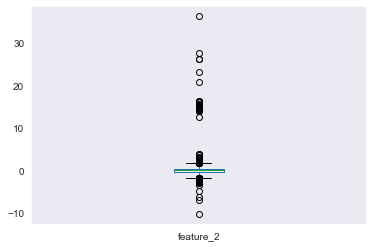

In [193]:
plot_boxplot(df, "feature_2")

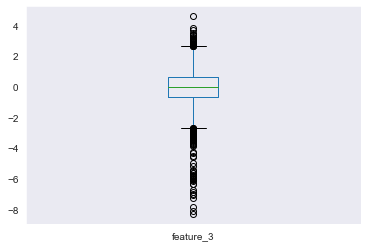

In [194]:
plot_boxplot(df, "feature_3")

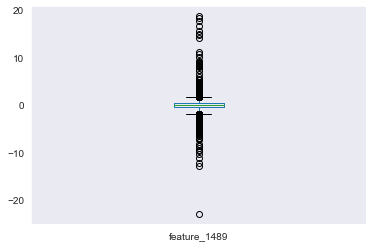

In [195]:
plot_boxplot(df, "feature_1489")

#  OUTLIERS

In [196]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

feature_2       0.917747
feature_3       1.334903
feature_4       1.230179
feature_5       1.234083
feature_6       0.242981
                  ...   
feature_1485    0.218401
feature_1486    0.477088
feature_1487    0.788679
feature_1488    0.857826
feature_1489    0.899609
Length: 1488, dtype: float64


In [197]:
#Drop feature 1
df.drop(["feature_1"], axis=1, inplace=True)

In [198]:
df

ref_group  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       group_D  -0.855401   0.878908  -0.294277  -0.276856  -0.070858   
1       group_X  -0.514954  -0.102163   0.533037   0.518627   0.130935   
2       unknown   0.659277   1.339006  -0.828283  -0.792608  -0.154456   
3       unknown  -0.451562   0.607107  -0.077825  -0.082196   0.046872   
4       unknown  -0.180138   0.715372  -0.874969  -0.842122  -0.257817   
...         ...        ...        ...        ...        ...        ...   
10438   group_D   0.990676  -2.177556   0.996033   1.015562   0.130092   
10439   group_D   0.217427  -1.293580  -0.189877  -0.059088   1.476607   
10440   group_D   1.446129  -1.329197   0.223080   0.152475   0.891322   
10441   group_D   1.177426  -1.571178   0.190298   0.261232   1.394647   
10442   group_D   0.842133   0.779006   0.333823   0.351760   2.080907   

       feature_7  feature_8  feature_9  feature_10  ...  feature_1480  \
0      -0.128097   0.002755   0.002755    0.002755  ...     -0.045789   
1       0.056910   0.705432   0.705432    0.705432  ...     -0.022304   
2      -0.138686  -0.501680  -0.501680   -0.501680  ...     -0.053745   
3       0.065412  -0.049056  -0.049056   -0.049056  ...     -0.034710   
4      -0.186609   0.026108   0.026108    0.026108  ...     -0.082815   
...          ...        ...        ...         ...  ...           ...   
10438   0.079168   0.461550   0.461550    0.461550  ...      2.390302   
10439   0.663995  -0.113285  -0.113285   -0.113285  ...      1.656760   
10440   1.135541  -0.310881  -0.310881   -0.310881  ...      2.184652   
10441   0.240026   0.499549   0.499549    0.499549  ...      1.868905   
10442   1.942566  -0.890494  -0.890494   -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10443 rows x 1489 columns]

# Dealing with Duplicate values

In [199]:
df.duplicated().sum()

118

In [200]:
df = df.drop_duplicates()

In [201]:
df

ref_group  feature_2  feature_3  feature_4  feature_5  feature_6  \
0       group_D  -0.855401   0.878908  -0.294277  -0.276856  -0.070858   
1       group_X  -0.514954  -0.102163   0.533037   0.518627   0.130935   
2       unknown   0.659277   1.339006  -0.828283  -0.792608  -0.154456   
3       unknown  -0.451562   0.607107  -0.077825  -0.082196   0.046872   
4       unknown  -0.180138   0.715372  -0.874969  -0.842122  -0.257817   
...         ...        ...        ...        ...        ...        ...   
10438   group_D   0.990676  -2.177556   0.996033   1.015562   0.130092   
10439   group_D   0.217427  -1.293580  -0.189877  -0.059088   1.476607   
10440   group_D   1.446129  -1.329197   0.223080   0.152475   0.891322   
10441   group_D   1.177426  -1.571178   0.190298   0.261232   1.394647   
10442   group_D   0.842133   0.779006   0.333823   0.351760   2.080907   

       feature_7  feature_8  feature_9  feature_10  ...  feature_1480  \
0      -0.128097   0.002755   0.002755    0.002755  ...     -0.045789   
1       0.056910   0.705432   0.705432    0.705432  ...     -0.022304   
2      -0.138686  -0.501680  -0.501680   -0.501680  ...     -0.053745   
3       0.065412  -0.049056  -0.049056   -0.049056  ...     -0.034710   
4      -0.186609   0.026108   0.026108    0.026108  ...     -0.082815   
...          ...        ...        ...         ...  ...           ...   
10438   0.079168   0.461550   0.461550    0.461550  ...      2.390302   
10439   0.663995  -0.113285  -0.113285   -0.113285  ...      1.656760   
10440   1.135541  -0.310881  -0.310881   -0.310881  ...      2.184652   
10441   0.240026   0.499549   0.499549    0.499549  ...      1.868905   
10442   1.942566  -0.890494  -0.890494   -0.890494  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10325 rows x 1489 columns]

In [202]:
#Categorical column
s= (df.dtypes == "object")
object_cols = list(s[s].index)
print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['ref_group']


In [203]:
# numeric column
df.drop(["ref_group"], axis=1, inplace=True)

C:\Users\Hp\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Checking for infinite values

In [204]:
#Checking for infinite values
count = np.isinf(df).values.sum()
count

8

# Replacing Blank Spaces with NaN

In [205]:
#Replacing blank spaces
data_new1 = df.copy()   # Create duplicate of data
data_new1 = data_new1.replace(r'^s*$', float('NaN'), regex = True)  # Replace blanks by NaN
print(data_new1)            

       feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0      -0.855401   0.878908  -0.294277  -0.276856  -0.070858  -0.128097   
1      -0.514954  -0.102163   0.533037   0.518627   0.130935   0.056910   
2       0.659277   1.339006  -0.828283  -0.792608  -0.154456  -0.138686   
3      -0.451562   0.607107  -0.077825  -0.082196   0.046872   0.065412   
4      -0.180138   0.715372  -0.874969  -0.842122  -0.257817  -0.186609   
...          ...        ...        ...        ...        ...        ...   
10438   0.990676  -2.177556   0.996033   1.015562   0.130092   0.079168   
10439   0.217427  -1.293580  -0.189877  -0.059088   1.476607   0.663995   
10440   1.446129  -1.329197   0.223080   0.152475   0.891322   1.135541   
10441   1.177426  -1.571178   0.190298   0.261232   1.394647   0.240026   
10442   0.842133   0.779006   0.333823   0.351760   2.080907   1.942566   

       feature_8  feature_9  feature_10  feature_11  ...  feature_1480  \
0       0.002755   0.0027

In [206]:
data_new1

feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0      -0.855401   0.878908  -0.294277  -0.276856  -0.070858  -0.128097   
1      -0.514954  -0.102163   0.533037   0.518627   0.130935   0.056910   
2       0.659277   1.339006  -0.828283  -0.792608  -0.154456  -0.138686   
3      -0.451562   0.607107  -0.077825  -0.082196   0.046872   0.065412   
4      -0.180138   0.715372  -0.874969  -0.842122  -0.257817  -0.186609   
...          ...        ...        ...        ...        ...        ...   
10438   0.990676  -2.177556   0.996033   1.015562   0.130092   0.079168   
10439   0.217427  -1.293580  -0.189877  -0.059088   1.476607   0.663995   
10440   1.446129  -1.329197   0.223080   0.152475   0.891322   1.135541   
10441   1.177426  -1.571178   0.190298   0.261232   1.394647   0.240026   
10442   0.842133   0.779006   0.333823   0.351760   2.080907   1.942566   

       feature_8  feature_9  feature_10  feature_11  ...  feature_1480  \
0       0.002755   0.002755    0.002755    0.649031  ...     -0.045789   
1       0.705432   0.705432    0.705432   -0.165675  ...     -0.022304   
2      -0.501680  -0.501680   -0.501680    1.309479  ...     -0.053745   
3      -0.049056  -0.049056   -0.049056    0.657141  ...     -0.034710   
4       0.026108   0.026108    0.026108    1.342965  ...     -0.082815   
...          ...        ...         ...         ...  ...           ...   
10438   0.461550   0.461550    0.461550   -0.333856  ...      2.390302   
10439  -0.113285  -0.113285   -0.113285   -1.408207  ...      1.656760   
10440  -0.310881  -0.310881   -0.310881   -2.148595  ...      2.184652   
10441   0.499549   0.499549    0.499549   -0.226187  ...      1.868905   
10442  -0.890494  -0.890494   -0.890494    0.124688  ...     -0.029928   

       feature_1481  feature_1482  feature_1483  feature_1484  feature_1485  \
0          0.080709      0.415204      0.315970      0.053744      0.005475   
1         -0.005560      0.035563     -0.602747     -0.518401      0.076930   
2          0.150198      1.753156      1.457758      0.792238      0.192345   
3          0.198073      0.486853      0.708950      0.458346      0.049311   
4         -0.120196     -0.206986      0.308589      0.165328     -0.178568   
...             ...           ...           ...           ...           ...   
10438      0.308977     -0.424661     -0.124231     -1.520750      1.051237   
10439      1.273029      0.152194      0.282033      0.066787     -0.407677   
10440      0.741075      0.181320     -0.433573     -0.273164      1.143032   
10441      2.335601      0.036954     -1.329824     -1.086468      2.569631   
10442      0.118218      0.080488      0.247873      0.249475     -0.968564   

       feature_1486  feature_1487  feature_1488  feature_1489  
0          0.371659      0.440701      0.052740      0.136543  
1          0.440759     -0.055697     -0.266469     -0.199136  
2          0.766976      1.753272      1.575992      1.462914  
3          0.782974      0.599300      0.927724      0.365220  
4         -0.258750      0.028454      0.249064      0.212119  
...             ...           ...           ...           ...  
10438      0.213921      0.278649      0.059149     -1.011049  
10439      0.857217     -0.795780     -0.558481     -1.036088  
10440      1.328969      0.213174      0.130744     -0.463390  
10441      0.891024     -0.687896     -0.816483     -1.144052  
10442      0.158163      0.383962      0.281649     -0.061514  

[10325 rows x 1488 columns]

In [207]:
#Check for Nan
data_new1.isnull().values.any()
data_new1.isnull().sum().sum()

2736425

In [208]:
#Checking for infinite values
count = np.isinf(data_new1).values.sum()
count

8

# Using SimpleImputer for solving Null Values and Infinite values

In [209]:
from sklearn.impute import SimpleImputer

data_new1.replace([np.inf, -np.inf], np.nan, inplace=True)

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')

imputer = imp_mean.fit(data_new1)

data_new1 = imp_mean.transform(data_new1)

print(data_new1)

[[-0.85540142  0.87890824 -0.29427662 ...  0.44070094  0.05274
   0.13654319]
 [-0.5149539  -0.10216264  0.53303729 ... -0.05569738 -0.26646862
  -0.19913639]
 [ 0.6592769   1.33900585 -0.82828313 ...  1.75327164  1.57599219
   1.46291354]
 ...
 [ 1.44612914 -1.32919714  0.22308029 ...  0.21317449  0.13074358
  -0.46338996]
 [ 1.17742556 -1.57117769  0.19029808 ... -0.68789599 -0.81648335
  -1.14405224]
 [ 0.84213253  0.77900559  0.33382331 ...  0.38396213  0.28164862
  -0.06151404]]


In this process, we replaced infinite values with nan and the null values are replaced with the median of the respective columns. We have chosen startegy "Median" since there are many outliers in our dataset.

# Scaling 

In [210]:
scaler = StandardScaler()
scaler.fit(data_new1)
scaled_ds = pd.DataFrame(scaler.transform(data_new1))
print("All features are now scaled")

All features are now scaled


In [211]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds

Dataframe to be used for further modelling:


0         1         2         3         4         5         6     \
0     -0.734566  0.896408  0.367026  0.372522  0.002342 -0.023015 -0.036283   
1     -0.448537 -0.047044  0.605165  0.599741  0.044063  0.022209  0.549349   
2      0.538000  1.338864  0.213314  0.225204 -0.014942 -0.025603 -0.456695   
3     -0.395278  0.635029  0.429331  0.428124  0.026683  0.024288 -0.079464   
4     -0.167240  0.739143  0.199876  0.211061 -0.036312 -0.037317 -0.016820   
...         ...       ...       ...       ...       ...       ...       ...   
10320  0.816427 -2.042859  0.738437  0.741684  0.043889  0.027650  0.346091   
10321  0.166777 -1.192778  0.397077  0.434724  0.322285  0.170608 -0.132994   
10322  1.199079 -1.227029  0.515945  0.495154  0.201276  0.285875 -0.297676   
10323  0.973326 -1.459731  0.506509  0.526219  0.305340  0.066971  0.377760   
10324  0.691627  0.800336  0.547822  0.552078  0.447226  0.483148 -0.780743   

           7         8         9     ...      1213      1214      1215  \
0     -0.036283 -0.036283 -0.193052  ... -0.052722 -0.043096  0.270650   
1      0.549349  0.549349 -0.510390  ... -0.051446 -0.062205  0.068661   
2     -0.456695 -0.456695  0.064201  ... -0.053155 -0.027704  0.982511   
3     -0.079464 -0.079464 -0.189893  ... -0.052120 -0.017100  0.308771   
4     -0.016820 -0.016820  0.077245  ... -0.054736 -0.087597 -0.060388   
...         ...       ...       ...  ...       ...       ...       ...   
10320  0.346091  0.346091 -0.575899  ...  0.079732  0.007465 -0.176203   
10321 -0.132994 -0.132994 -0.994372  ...  0.039848  0.221004  0.130715   
10322 -0.297676 -0.297676 -1.282763  ...  0.068550  0.103175  0.146211   
10323  0.377760  0.377760 -0.533960  ...  0.051383  0.456364  0.069401   
10324 -0.780743 -0.780743 -0.397290  ... -0.051860 -0.034788  0.092563   

           1216      1217      1218      1219      1220      1221      1222  
0      0.250587  0.140456 -0.101779  0.116925  0.328115  0.055731  0.215918  
1     -0.458072 -0.342502 -0.088582  0.140851  0.031663 -0.194432 -0.070840  
2      1.131315  0.763833 -0.067265  0.253804  1.111990  1.249502  1.348982  
3      0.553716  0.481989 -0.093683  0.259343  0.422831  0.741455  0.411267  
4      0.244894  0.234646 -0.135771 -0.101355  0.081918  0.209590  0.280479  
...         ...       ...       ...       ...       ...       ...       ...  
10320 -0.088965 -1.188603  0.091367  0.062308  0.231336  0.060754 -0.764424  
10321  0.224410  0.151466 -0.178086  0.285050 -0.410320 -0.423282 -0.785813  
10322 -0.327578 -0.135492  0.108321  0.448395  0.192235  0.116862 -0.296581  
10323 -1.018908 -0.822018  0.371805  0.296756 -0.345891 -0.625478 -0.878043  
10324  0.198060  0.305677 -0.281678  0.043002  0.294230  0.235126  0.046725  

[10325 rows x 1223 columns]

In [212]:
scaled_ds

0         1         2         3         4         5         6     \
0     -0.734566  0.896408  0.367026  0.372522  0.002342 -0.023015 -0.036283   
1     -0.448537 -0.047044  0.605165  0.599741  0.044063  0.022209  0.549349   
2      0.538000  1.338864  0.213314  0.225204 -0.014942 -0.025603 -0.456695   
3     -0.395278  0.635029  0.429331  0.428124  0.026683  0.024288 -0.079464   
4     -0.167240  0.739143  0.199876  0.211061 -0.036312 -0.037317 -0.016820   
...         ...       ...       ...       ...       ...       ...       ...   
10320  0.816427 -2.042859  0.738437  0.741684  0.043889  0.027650  0.346091   
10321  0.166777 -1.192778  0.397077  0.434724  0.322285  0.170608 -0.132994   
10322  1.199079 -1.227029  0.515945  0.495154  0.201276  0.285875 -0.297676   
10323  0.973326 -1.459731  0.506509  0.526219  0.305340  0.066971  0.377760   
10324  0.691627  0.800336  0.547822  0.552078  0.447226  0.483148 -0.780743   

           7         8         9     ...      1213      1214      1215  \
0     -0.036283 -0.036283 -0.193052  ... -0.052722 -0.043096  0.270650   
1      0.549349  0.549349 -0.510390  ... -0.051446 -0.062205  0.068661   
2     -0.456695 -0.456695  0.064201  ... -0.053155 -0.027704  0.982511   
3     -0.079464 -0.079464 -0.189893  ... -0.052120 -0.017100  0.308771   
4     -0.016820 -0.016820  0.077245  ... -0.054736 -0.087597 -0.060388   
...         ...       ...       ...  ...       ...       ...       ...   
10320  0.346091  0.346091 -0.575899  ...  0.079732  0.007465 -0.176203   
10321 -0.132994 -0.132994 -0.994372  ...  0.039848  0.221004  0.130715   
10322 -0.297676 -0.297676 -1.282763  ...  0.068550  0.103175  0.146211   
10323  0.377760  0.377760 -0.533960  ...  0.051383  0.456364  0.069401   
10324 -0.780743 -0.780743 -0.397290  ... -0.051860 -0.034788  0.092563   

           1216      1217      1218      1219      1220      1221      1222  
0      0.250587  0.140456 -0.101779  0.116925  0.328115  0.055731  0.215918  
1     -0.458072 -0.342502 -0.088582  0.140851  0.031663 -0.194432 -0.070840  
2      1.131315  0.763833 -0.067265  0.253804  1.111990  1.249502  1.348982  
3      0.553716  0.481989 -0.093683  0.259343  0.422831  0.741455  0.411267  
4      0.244894  0.234646 -0.135771 -0.101355  0.081918  0.209590  0.280479  
...         ...       ...       ...       ...       ...       ...       ...  
10320 -0.088965 -1.188603  0.091367  0.062308  0.231336  0.060754 -0.764424  
10321  0.224410  0.151466 -0.178086  0.285050 -0.410320 -0.423282 -0.785813  
10322 -0.327578 -0.135492  0.108321  0.448395  0.192235  0.116862 -0.296581  
10323 -1.018908 -0.822018  0.371805  0.296756 -0.345891 -0.625478 -0.878043  
10324  0.198060  0.305677 -0.281678  0.043002  0.294230  0.235126  0.046725  

[10325 rows x 1223 columns]

# TRAINING THE MODEL

In [215]:
x= scaled_ds
y= object_cols
x

0         1         2         3         4         5         6     \
0     -0.734566  0.896408  0.367026  0.372522  0.002342 -0.023015 -0.036283   
1     -0.448537 -0.047044  0.605165  0.599741  0.044063  0.022209  0.549349   
2      0.538000  1.338864  0.213314  0.225204 -0.014942 -0.025603 -0.456695   
3     -0.395278  0.635029  0.429331  0.428124  0.026683  0.024288 -0.079464   
4     -0.167240  0.739143  0.199876  0.211061 -0.036312 -0.037317 -0.016820   
...         ...       ...       ...       ...       ...       ...       ...   
10320  0.816427 -2.042859  0.738437  0.741684  0.043889  0.027650  0.346091   
10321  0.166777 -1.192778  0.397077  0.434724  0.322285  0.170608 -0.132994   
10322  1.199079 -1.227029  0.515945  0.495154  0.201276  0.285875 -0.297676   
10323  0.973326 -1.459731  0.506509  0.526219  0.305340  0.066971  0.377760   
10324  0.691627  0.800336  0.547822  0.552078  0.447226  0.483148 -0.780743   

           7         8         9     ...      1213      1214      1215  \
0     -0.036283 -0.036283 -0.193052  ... -0.052722 -0.043096  0.270650   
1      0.549349  0.549349 -0.510390  ... -0.051446 -0.062205  0.068661   
2     -0.456695 -0.456695  0.064201  ... -0.053155 -0.027704  0.982511   
3     -0.079464 -0.079464 -0.189893  ... -0.052120 -0.017100  0.308771   
4     -0.016820 -0.016820  0.077245  ... -0.054736 -0.087597 -0.060388   
...         ...       ...       ...  ...       ...       ...       ...   
10320  0.346091  0.346091 -0.575899  ...  0.079732  0.007465 -0.176203   
10321 -0.132994 -0.132994 -0.994372  ...  0.039848  0.221004  0.130715   
10322 -0.297676 -0.297676 -1.282763  ...  0.068550  0.103175  0.146211   
10323  0.377760  0.377760 -0.533960  ...  0.051383  0.456364  0.069401   
10324 -0.780743 -0.780743 -0.397290  ... -0.051860 -0.034788  0.092563   

           1216      1217      1218      1219      1220      1221      1222  
0      0.250587  0.140456 -0.101779  0.116925  0.328115  0.055731  0.215918  
1     -0.458072 -0.342502 -0.088582  0.140851  0.031663 -0.194432 -0.070840  
2      1.131315  0.763833 -0.067265  0.253804  1.111990  1.249502  1.348982  
3      0.553716  0.481989 -0.093683  0.259343  0.422831  0.741455  0.411267  
4      0.244894  0.234646 -0.135771 -0.101355  0.081918  0.209590  0.280479  
...         ...       ...       ...       ...       ...       ...       ...  
10320 -0.088965 -1.188603  0.091367  0.062308  0.231336  0.060754 -0.764424  
10321  0.224410  0.151466 -0.178086  0.285050 -0.410320 -0.423282 -0.785813  
10322 -0.327578 -0.135492  0.108321  0.448395  0.192235  0.116862 -0.296581  
10323 -1.018908 -0.822018  0.371805  0.296756 -0.345891 -0.625478 -0.878043  
10324  0.198060  0.305677 -0.281678  0.043002  0.294230  0.235126  0.046725  

[10325 rows x 1223 columns]

In [258]:
model = sklearn.cluster.KMeans(n_clusters=6)
model.fit(x)
y_predict = model.predict(x)
print(model.inertia_)
print(model.labels_)
print(model.cluster_centers_)

6324682.186171094
[2 2 1 ... 1 2 1]
[[ 5.20423347e-03 -1.21149995e-01 -2.17135782e+00 ... -9.26424345e-01
  -8.25717579e-01  5.99473684e+00]
 [-1.22759246e-01  4.48532131e-01  3.68171694e-01 ...  1.89400054e-01
   3.56889996e-01  2.23667100e-02]
 [ 1.83862869e-02 -2.66771015e-01  4.64678990e-01 ... -1.82384762e-01
  -1.54677061e-01  8.13756614e-01]
 [-5.00428530e+00 -7.51723175e+00 -2.86826990e+00 ... -5.55592952e+00
  -7.85578360e+00  4.00000000e+00]
 [ 2.24599876e+01 -5.62888877e-01 -2.43997148e+00 ...  1.05816233e+01
   7.87132496e+00  5.00000000e+00]
 [ 4.37121461e-01 -4.83563213e-01 -1.83432656e+00 ...  1.89815294e+00
   4.69620338e-01  2.00165289e+00]]


In [259]:
df["cluster_id"] = model.labels_
df

<ipython-input-259-45b145332da1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



feature_2  feature_3  feature_4  feature_5  feature_6  feature_7  \
0      -0.855401   0.878908  -0.294277  -0.276856  -0.070858  -0.128097   
1      -0.514954  -0.102163   0.533037   0.518627   0.130935   0.056910   
2       0.659277   1.339006  -0.828283  -0.792608  -0.154456  -0.138686   
3      -0.451562   0.607107  -0.077825  -0.082196   0.046872   0.065412   
4      -0.180138   0.715372  -0.874969  -0.842122  -0.257817  -0.186609   
...          ...        ...        ...        ...        ...        ...   
10438   0.990676  -2.177556   0.996033   1.015562   0.130092   0.079168   
10439   0.217427  -1.293580  -0.189877  -0.059088   1.476607   0.663995   
10440   1.446129  -1.329197   0.223080   0.152475   0.891322   1.135541   
10441   1.177426  -1.571178   0.190298   0.261232   1.394647   0.240026   
10442   0.842133   0.779006   0.333823   0.351760   2.080907   1.942566   

       feature_8  feature_9  feature_10  feature_11  ...  feature_1481  \
0       0.002755   0.002755    0.002755    0.649031  ...      0.080709   
1       0.705432   0.705432    0.705432   -0.165675  ...     -0.005560   
2      -0.501680  -0.501680   -0.501680    1.309479  ...      0.150198   
3      -0.049056  -0.049056   -0.049056    0.657141  ...      0.198073   
4       0.026108   0.026108    0.026108    1.342965  ...     -0.120196   
...          ...        ...         ...         ...  ...           ...   
10438   0.461550   0.461550    0.461550   -0.333856  ...      0.308977   
10439  -0.113285  -0.113285   -0.113285   -1.408207  ...      1.273029   
10440  -0.310881  -0.310881   -0.310881   -2.148595  ...      0.741075   
10441   0.499549   0.499549    0.499549   -0.226187  ...      2.335601   
10442  -0.890494  -0.890494   -0.890494    0.124688  ...      0.118218   

       feature_1482  feature_1483  feature_1484  feature_1485  feature_1486  \
0          0.415204      0.315970      0.053744      0.005475      0.371659   
1          0.035563     -0.602747     -0.518401      0.076930      0.440759   
2          1.753156      1.457758      0.792238      0.192345      0.766976   
3          0.486853      0.708950      0.458346      0.049311      0.782974   
4         -0.206986      0.308589      0.165328     -0.178568     -0.258750   
...             ...           ...           ...           ...           ...   
10438     -0.424661     -0.124231     -1.520750      1.051237      0.213921   
10439      0.152194      0.282033      0.066787     -0.407677      0.857217   
10440      0.181320     -0.433573     -0.273164      1.143032      1.328969   
10441      0.036954     -1.329824     -1.086468      2.569631      0.891024   
10442      0.080488      0.247873      0.249475     -0.968564      0.158163   

       feature_1487  feature_1488  feature_1489  cluster_id  
0          0.440701      0.052740      0.136543           2  
1         -0.055697     -0.266469     -0.199136           2  
2          1.753272      1.575992      1.462914           1  
3          0.599300      0.927724      0.365220           1  
4          0.028454      0.249064      0.212119           2  
...             ...           ...           ...         ...  
10438      0.278649      0.059149     -1.011049           1  
10439     -0.795780     -0.558481     -1.036088           2  
10440      0.213174      0.130744     -0.463390           1  
10441     -0.687896     -0.816483     -1.144052           2  
10442      0.383962      0.281649     -0.061514           1  

[10325 rows x 1489 columns]

In [260]:
df["cluster_id"].unique()

array([2, 1, 5, 0, 3, 4])

# Identifying the number of clusters

In [261]:
k_list = []
elbow_scores = []

for k in range(2, 10):
    k_list.append(k)
    model = sklearn.cluster.KMeans(n_clusters=k)
    model.fit(x)
    es = model.inertia_
    elbow_scores.append(es)

In [262]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=k_list, y=elbow_scores))
fig.show()

From the above plot it's clear that there 7 or 8 clusters.

In [275]:
model = sklearn.cluster.KMeans(n_clusters=8)
clusters = model.fit_predict(x)
print(model.inertia_)
print(model.labels_)
print(model.cluster_centers_)

5712916.1038612835
[1 1 7 ... 7 1 7]
[[-1.19670726e-01 -4.66224679e+00  3.61314087e+00 ... -6.92302883e-01
  -3.71616414e+00  4.00000000e+00]
 [ 4.00960339e-03 -2.06218531e-01  4.43466918e-01 ... -1.65970292e-01
  -1.14461315e-01  5.77315973e-14]
 [ 4.36719473e-01 -4.75211799e-01 -1.84466394e+00 ...  1.91288097e+00
   4.83112651e-01  1.00000000e+00]
 ...
 [-3.79433329e+00 -7.44450680e+00 -2.95610621e+00 ... -7.68009758e+00
  -1.35624528e+01  3.00000000e+00]
 [ 2.24599876e+01 -5.62888877e-01 -2.43997148e+00 ...  1.05816233e+01
   7.87132496e+00  2.00000000e+00]
 [-1.10695853e-01  4.44419323e-01  3.66881929e-01 ...  1.92392317e-01
   3.60458711e-01  6.00000000e+00]]


In [276]:
x["label"] = clusters
x["label"]

0        1
1        1
2        7
3        7
4        1
        ..
10320    7
10321    1
10322    7
10323    1
10324    7
Name: label, Length: 10325, dtype: int32

In [277]:
clusters

array([1, 1, 7, ..., 7, 1, 7])

# Principal Component Analysis

In [278]:
#Create a Covariance matrix
covar_matrix = PCA(n_components = 1224 ) 

In [279]:
#Calculating Eigenvalues
covar_matrix.fit(x)

#calculate variance ratios
variance = covar_matrix.explained_variance_ratio_

In [280]:
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

#cumulative sum of variance explained with [n] features
var

array([22.9, 41.8, 51.6, ..., 98.2, 98.2, 98.2])

In [281]:
var[90], var[18]

(98.19999999999979, 89.69999999999999)

In the above array we see that the first feature explains roughly 23% of the variance within our data set 
while the first two explain 42% and so on. If we employ 18 features we capture 90% of the variance within the dataset, 
thus we gain very little by implementing an additional feature.

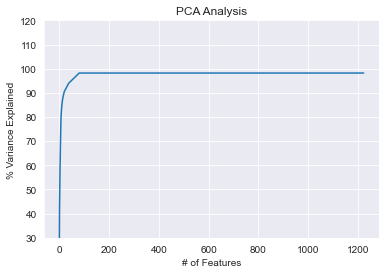

In [282]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,120)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

From the above plot, it's clear that we need to choose 18 features to get 90 % Variance and for getting 98% variance we need to 
choose 90 features.

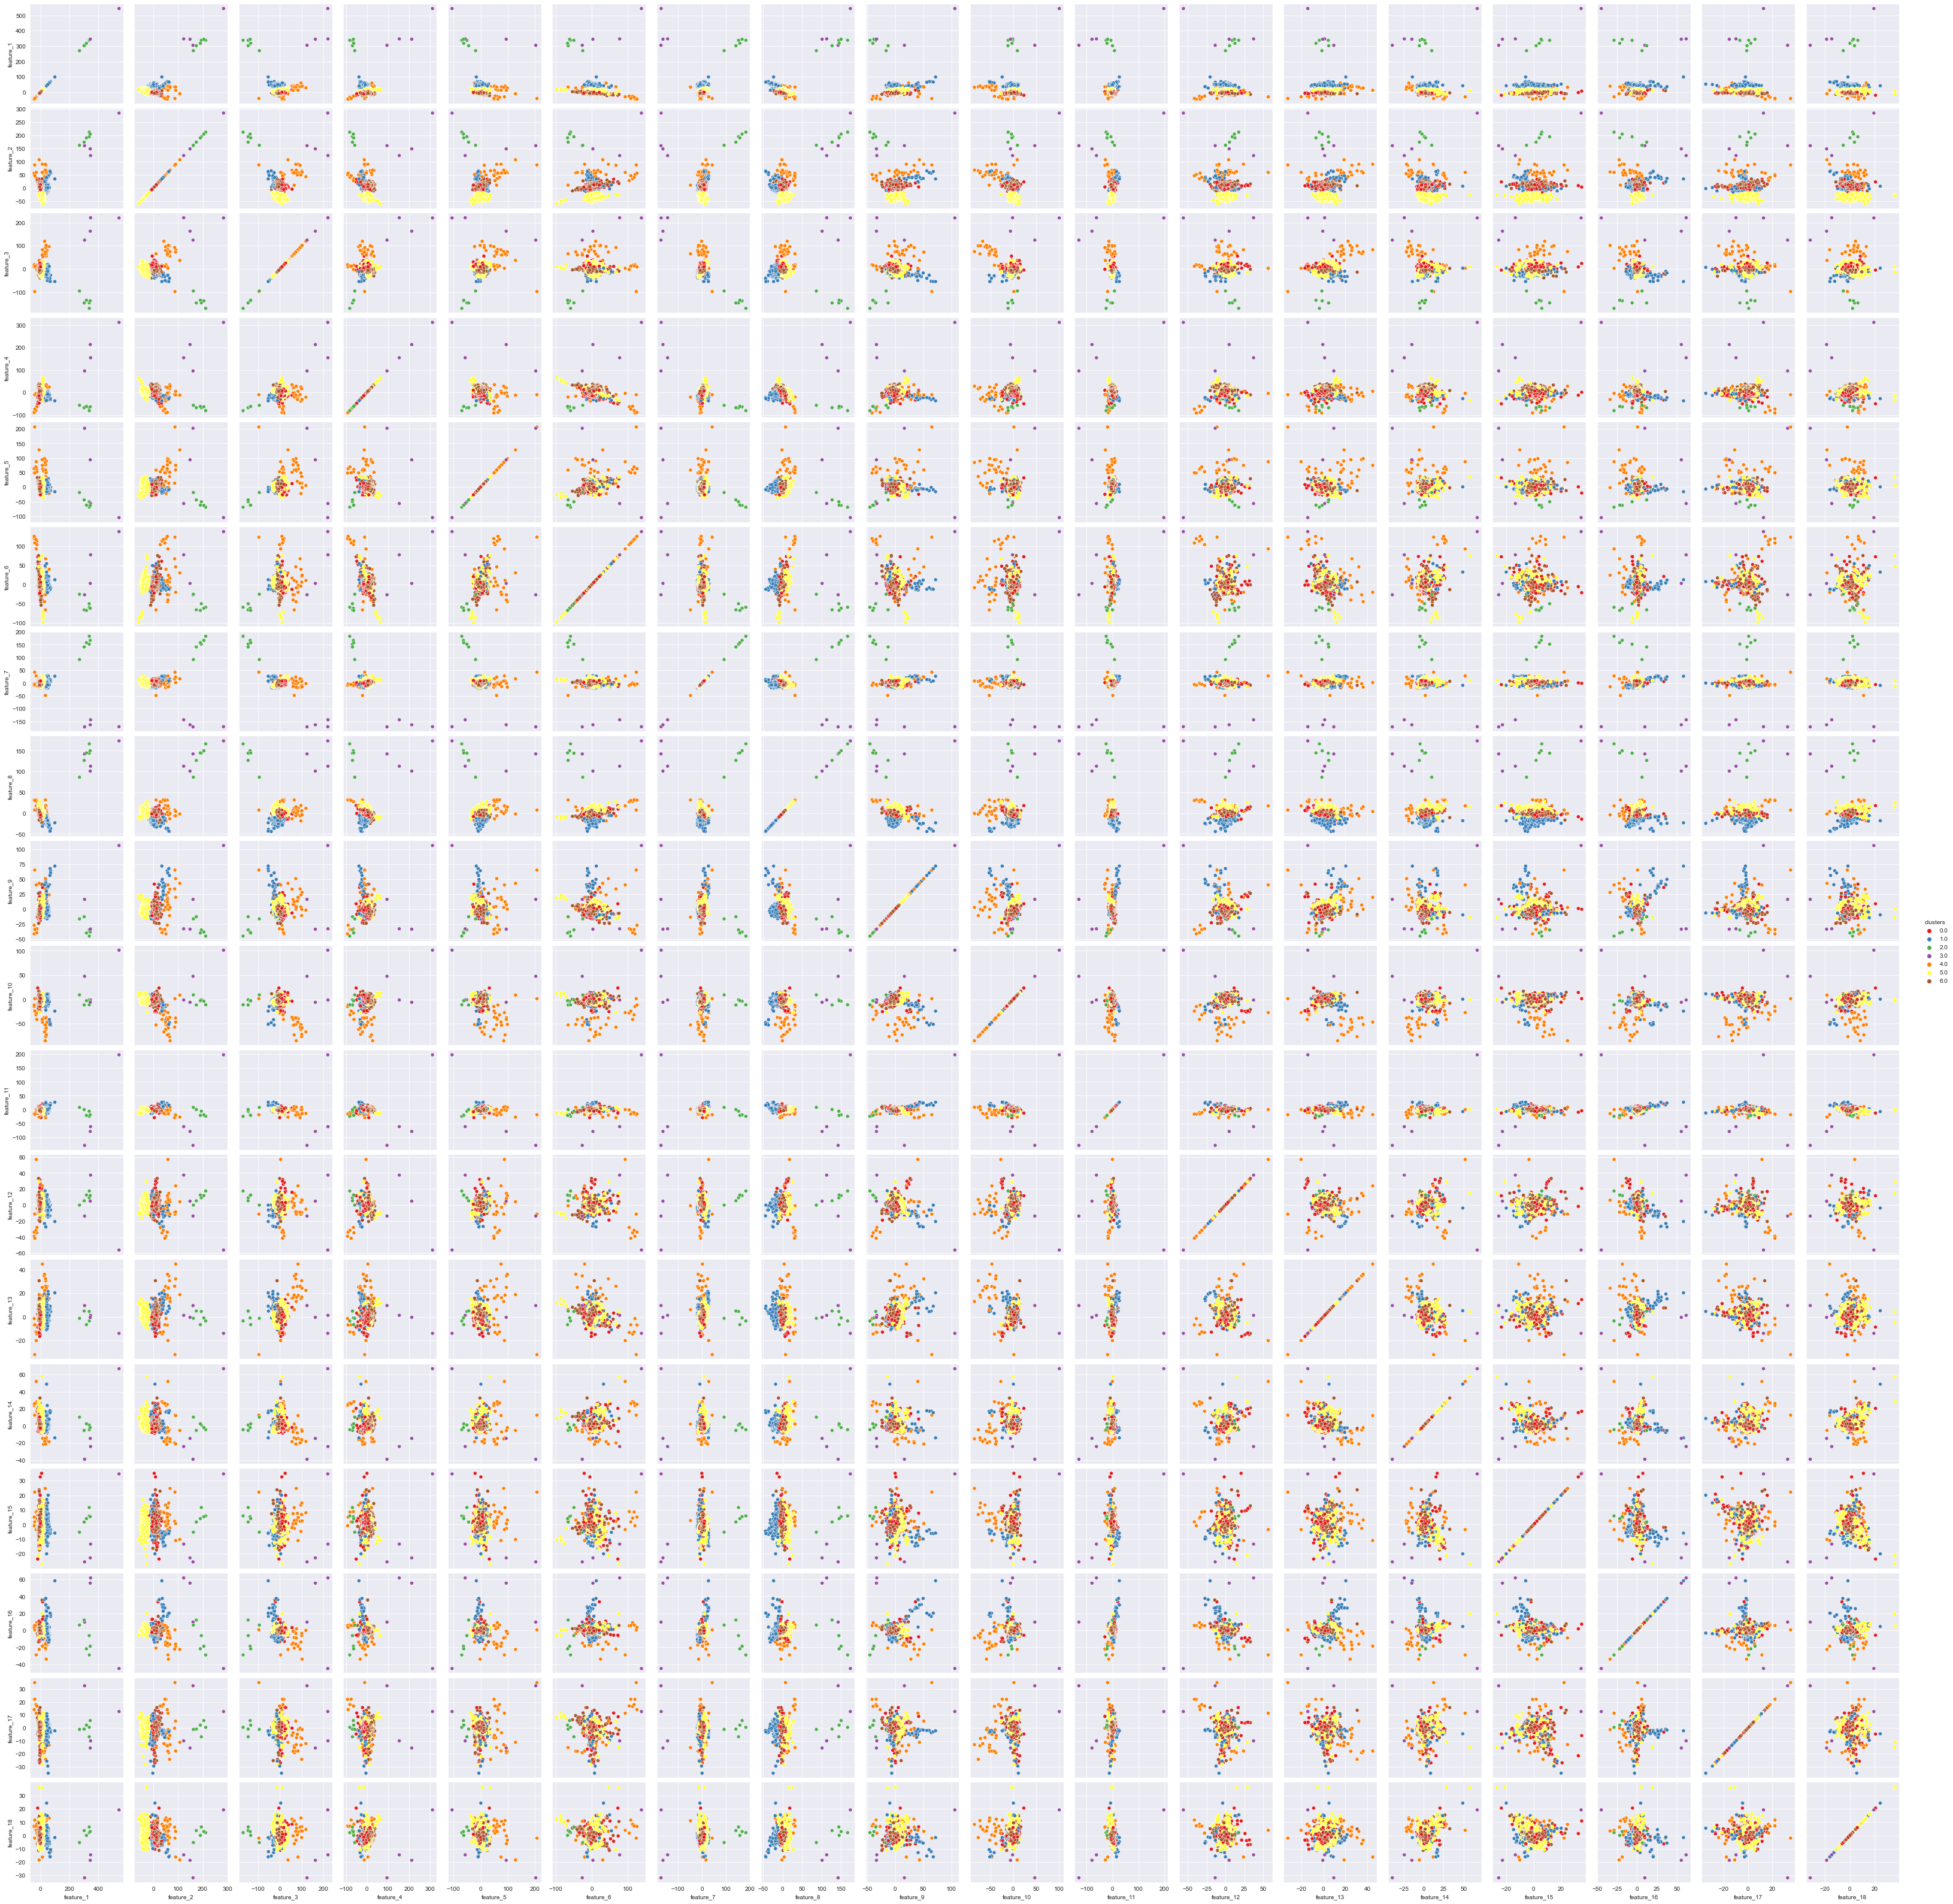

In [271]:
pca=PCA(n_components=18)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5', 'feature_6', 'feature_7', 'feature_8',
                                                                      'feature_9', 'feature_10', 'feature_11', 'feature_12',
                                                                      'feature_13', 'feature_14', 'feature_15', 'feature_16',
                                                                       'feature_17', 'feature_18','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

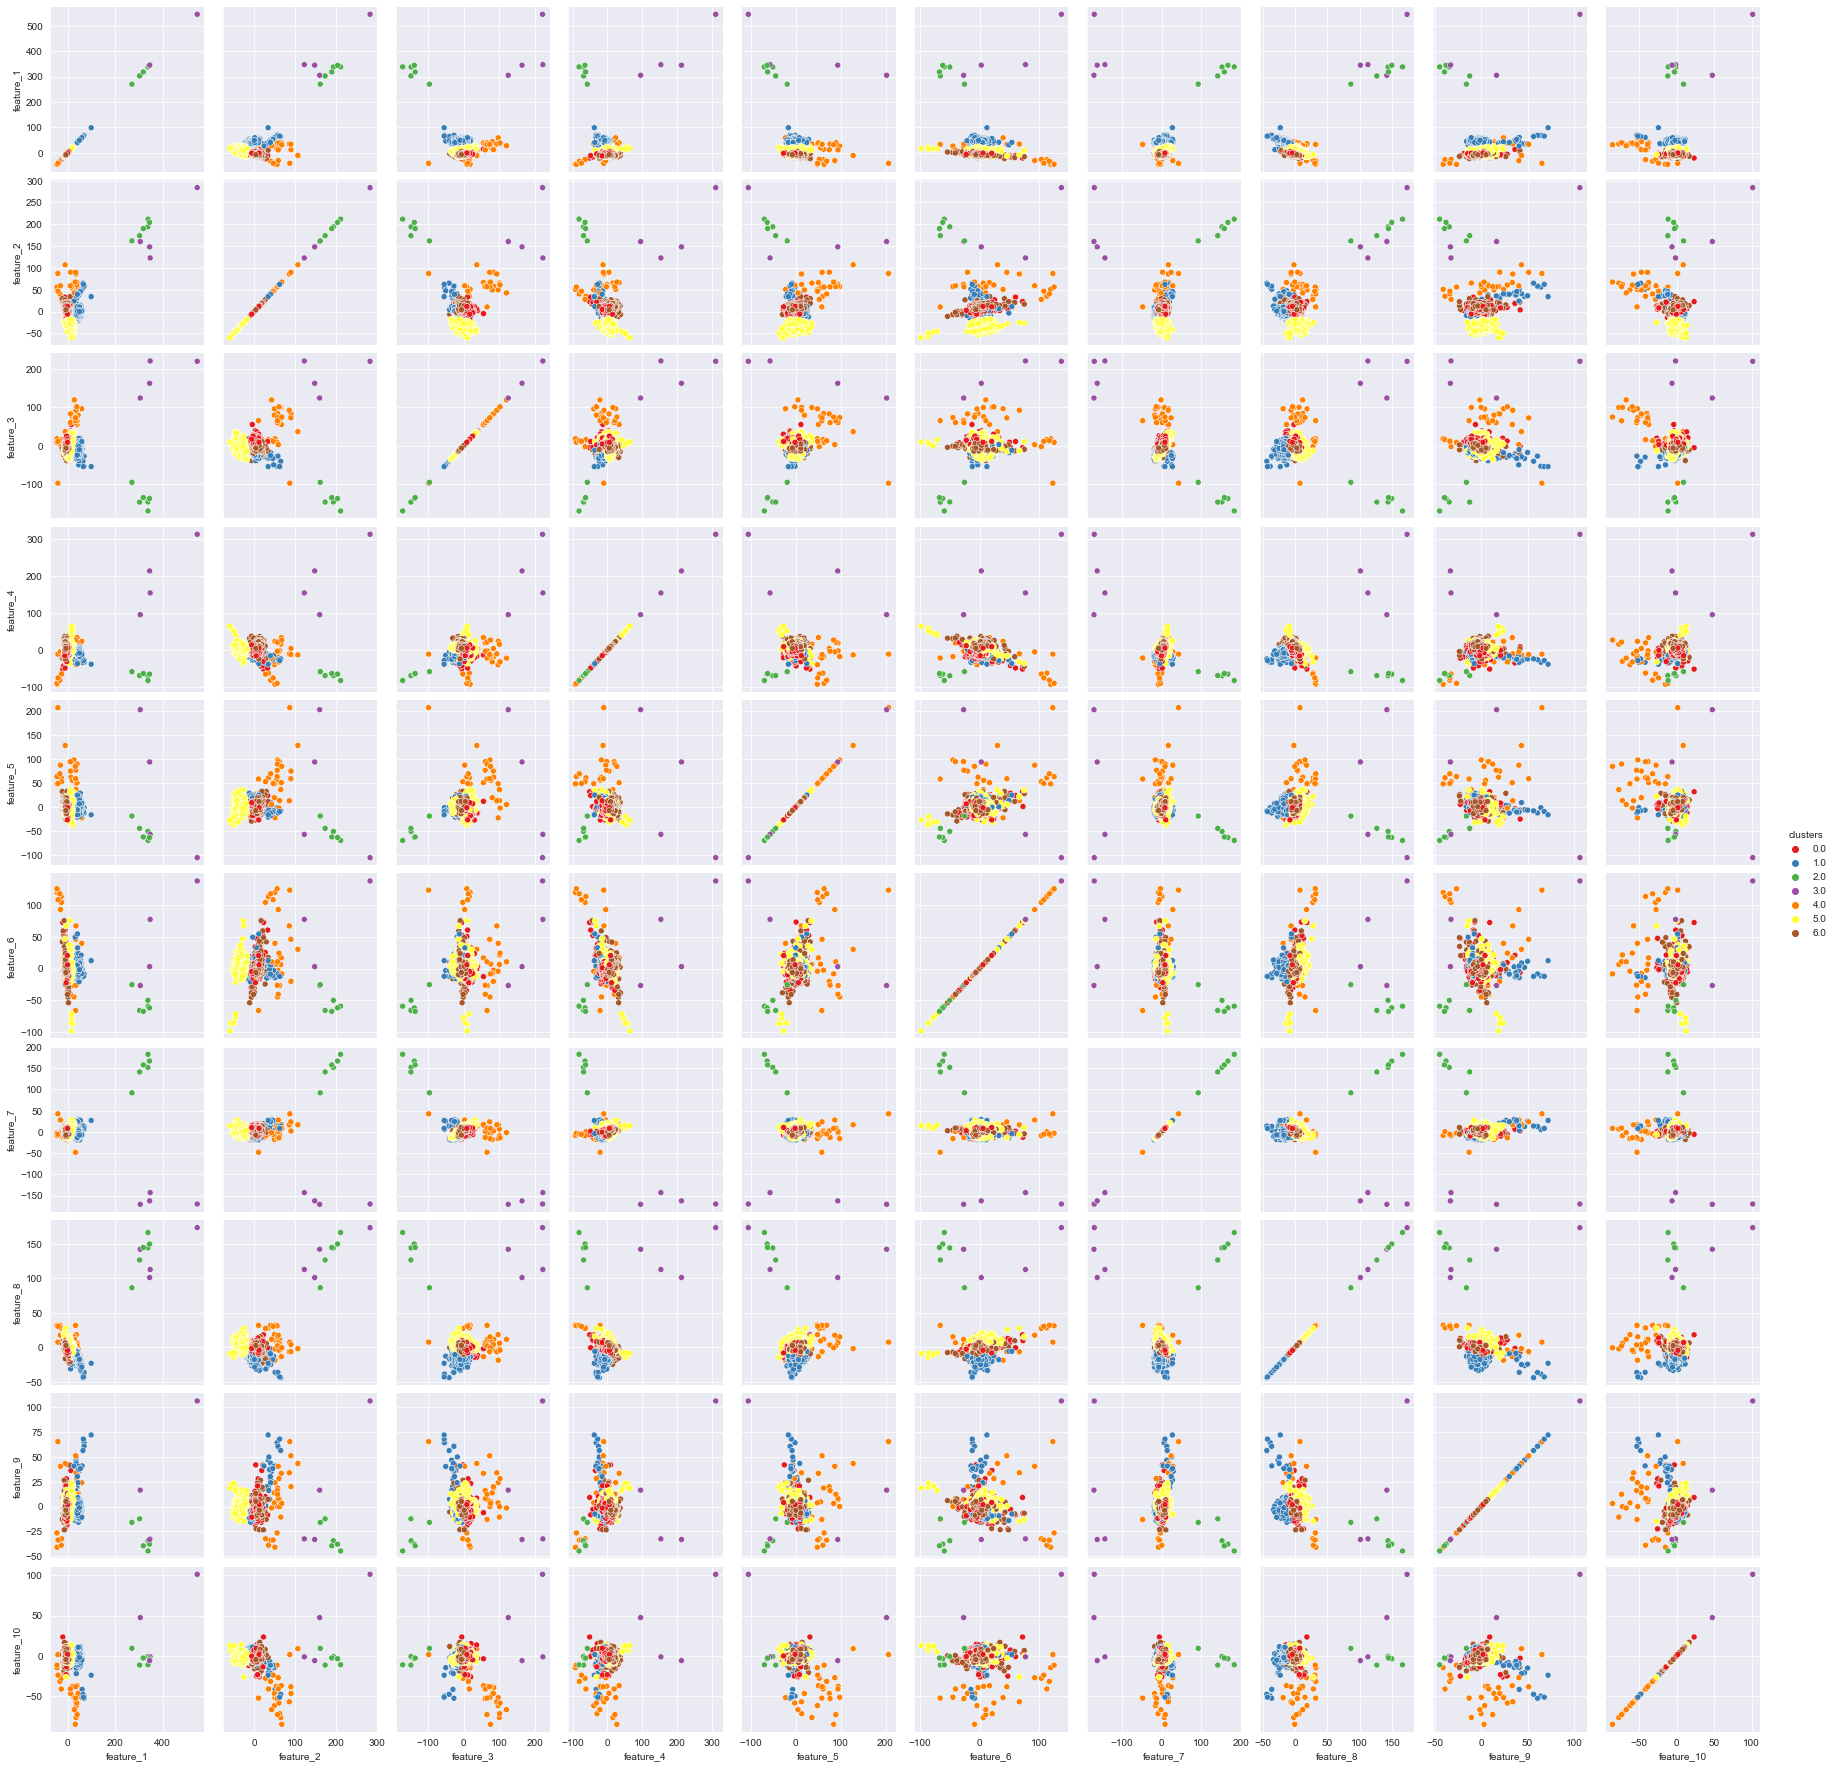

In [272]:
pca=PCA(n_components=10)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5', 'feature_6', 'feature_7', 'feature_8',
                                                                      'feature_9', 'feature_10','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

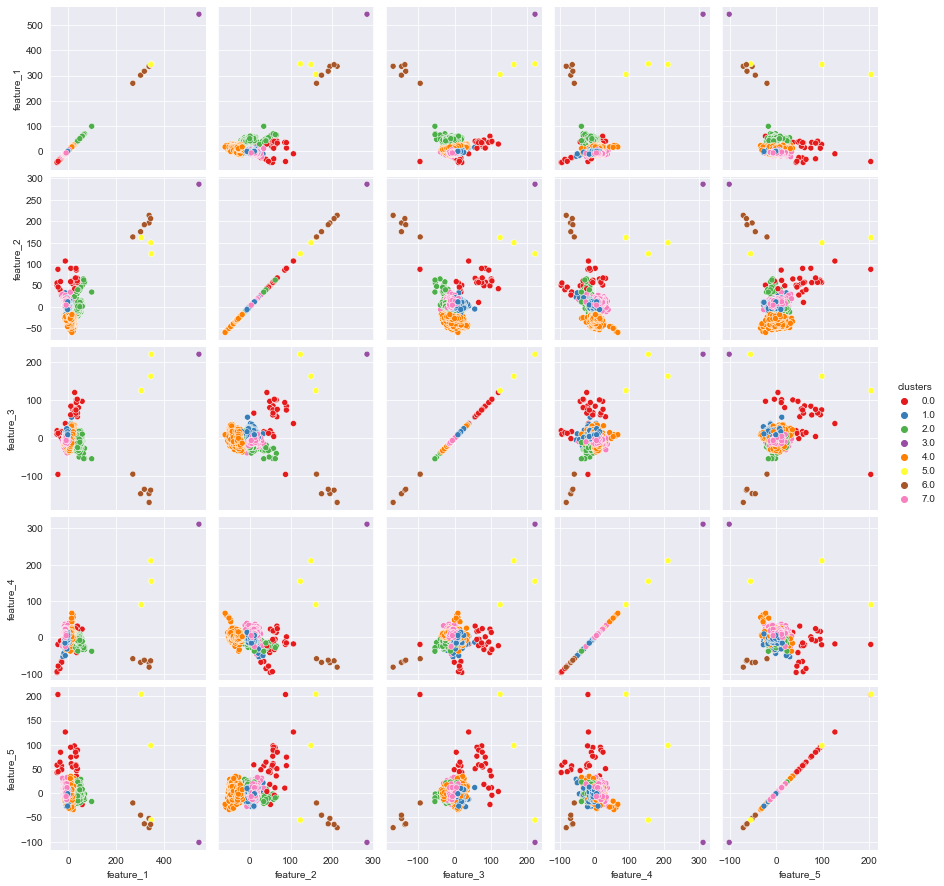

In [284]:
pca=PCA(n_components= 5)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','feature_3','feature_4',
                                                                      'feature_5','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()

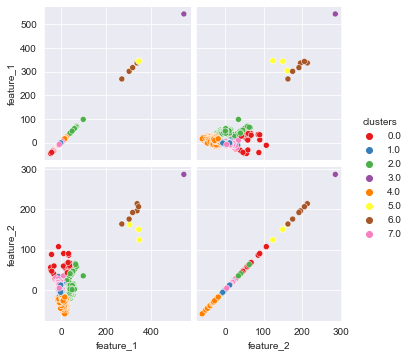

In [283]:
pca=PCA(n_components=2)
reduced=pca.fit_transform(x)

reduced=pd.DataFrame(np.column_stack([reduced, clusters]), columns=['feature_1','feature_2','clusters'])

sns.pairplot(reduced, hue='clusters', diag_kind=None, vars=reduced.columns[0:-1], palette='Set1')
plt.show()